In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [16]:
# To see respective format files (.csv,.xlsx,.png,..)

import glob
glob.glob('*.xlsx')

['Dataset-Churn modelling.xlsx']

In [17]:
xls = pd.ExcelFile('Dataset-Churn modelling.xlsx')
df1 = pd.read_excel(xls, 'Description')
data = pd.read_excel(xls, 'Data')

In [18]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [19]:
data.shape

(3333, 11)

In [30]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [34]:
# Let's get a sense of the numbers across the two classes

data.groupby('Churn').mean()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.700000



### Observations:
    
1.The average Datausage of customers who Cancelled the service is less than who don't

2.The AVerage CustServCalls are more for the service cancelled customers

3.The Average Monthly bill is more for cancelled service customers

4.The OverageFee is more for the Cancelled customers

Text(0,0.5,'Frequency of Dataplan')

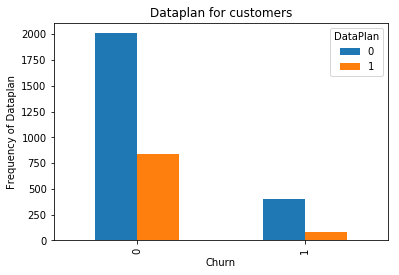

In [36]:
%matplotlib inline
pd.crosstab(data.Churn,data.DataPlan).plot(kind='bar')
plt.title('Dataplan for customers')
plt.xlabel('Churn')
plt.ylabel('Frequency of Dataplan')

Text(0,0.5,'Frequency of Contract Renewal')

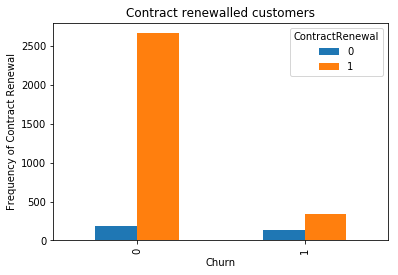

In [38]:
pd.crosstab(data.Churn,data.ContractRenewal).plot(kind='bar')
plt.title('Contract renewalled customers')
plt.xlabel('Churn')
plt.ylabel('Frequency of Contract Renewal')

In [39]:
X.dtypes

AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [20]:
#Splitting data set into X (independent) and Y (dependent) values
X = data.iloc[:,1:11]
Y = data.iloc[:,0]

In [21]:
X.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [25]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [27]:
# 1 if customer cancelled service, 0 if not

Y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [28]:
X.corr()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
AccountWeeks,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023
RoamMins,0.009514,-0.045871,-0.001318,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIFfunc(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i) for i in range(data_mat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = x.columns
    vif_factors['vif'] = vif
    return vif_factors

VIFfunc(X)

,columns,vif
0,AccountWeeks,6.969086
1,ContractRenewal,9.084304
2,DataPlan,16.390971
3,DataUsage,2673.389295
4,CustServCalls,2.369319
5,DayMins,11947.872145
6,DayCalls,19.355670
7,MonthlyCharge,40112.821142
8,OverageFee,3676.968227
9,RoamMins,15.593407


In [41]:
X.drop(['OverageFee','MonthlyCharge','DayMins','DataUsage'],axis = 1, inplace = True)

In [42]:
VIFfunc(X)

,columns,vif
0,AccountWeeks,6.707545
1,ContractRenewal,8.413318
2,DataPlan,1.370787
3,CustServCalls,2.348185
4,DayCalls,15.245214
5,RoamMins,11.013889


In [43]:
X.drop(['DayCalls'],axis = 1, inplace = True)

In [44]:
VIFfunc(X)

,columns,vif
0,AccountWeeks,5.953181
1,ContractRenewal,7.044620
2,DataPlan,1.365020
3,CustServCalls,2.315686
4,RoamMins,8.196927


In [45]:
import statsmodels.api as sm

logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.362157
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                  0.1248
Time:                        17:38:03   Log-Likelihood:                -1207.1
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 3.206e-73
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
AccountWeeks       -0.0029      0.001     -2.543      0.011      -0.005      -0.001
ContractRenewa

In [46]:
X.drop(['RoamMins'],axis = 1, inplace = True)

In [57]:
X.keys()


Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'CustServCalls'], dtype='object')

In [47]:
import statsmodels.api as sm

logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.362219
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                  0.1246
Time:                        17:39:03   Log-Likelihood:                -1207.3
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 3.377e-74
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
AccountWeeks       -0.0034      0.001     -3.651      0.000      -0.005      -0.002
ContractRenewa

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

### Logistic Model fitting

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results and caculating the accuracy

In [50]:
y_pred = logreg.predict(X_test)

In [51]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


### Cross Validation

In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state= 0 )
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.854


### Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[843  19]
 [122  16]]


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       862
           1       0.46      0.12      0.18       138

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.67      0.55      0.55      1000
weighted avg       0.82      0.86      0.82      1000



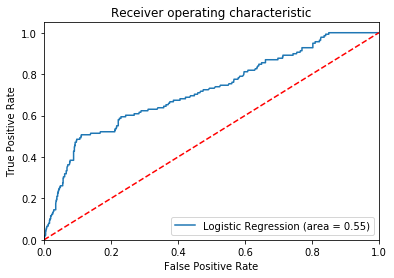

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()